The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step 938/938 [==============================] - loss: 0.0171 - acc: 0.9353 - 25ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0409 - acc: 0.9764 - 26ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0039 - acc: 0.9809 - 25ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0037 - acc: 0.9829 - 25ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.0347 - acc: 0.9853 - 25ms/step          
Eval begin...
step 157/157 [==============================] - loss: 6.4859e-04 - acc: 0.9807 - 11ms/step        
Eval samples: 10000
true label: 7, pred label: 7


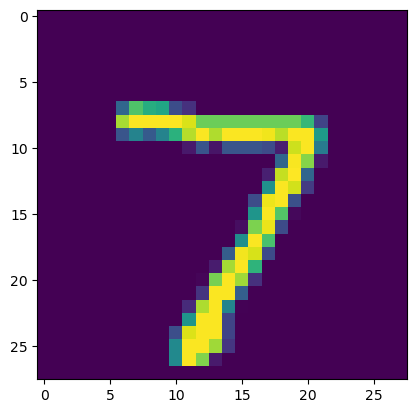

In [1]:
import paddle
import numpy as np
from paddle.vision.transforms import Normalize

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

# 模型组网并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)
model = paddle.Model(lenet)

# 模型训练的配置准备，准备损失函数，优化器和评价指标
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()), 
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 模型训练
model.fit(train_dataset, epochs=5, batch_size=64, verbose=1)
# 模型评估
model.evaluate(test_dataset, batch_size=64, verbose=1)

# 保存模型
model.save('./output/mnist')
# 加载模型
model.load('output/mnist')

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])


In [3]:
import paddle
from paddle.vision.transforms import Normalize

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

# 打印数据集里图片数量
print('{} images in train_dataset, {} images in test_dataset'.format(len(train_dataset), len(test_dataset)))


60000 images in train_dataset, 10000 images in test_dataset


In [4]:
# 模型组网并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)

# 可视化模型组网结构和参数
paddle.summary(lenet,(1, 1, 28, 28))


---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Conv2D-3       [[1, 1, 28, 28]]      [1, 6, 28, 28]          60       
    ReLU-3        [[1, 6, 28, 28]]      [1, 6, 28, 28]           0       
  MaxPool2D-3     [[1, 6, 28, 28]]      [1, 6, 14, 14]           0       
   Conv2D-4       [[1, 6, 14, 14]]     [1, 16, 10, 10]         2,416     
    ReLU-4       [[1, 16, 10, 10]]     [1, 16, 10, 10]           0       
  MaxPool2D-4    [[1, 16, 10, 10]]      [1, 16, 5, 5]            0       
   Linear-4          [[1, 400]]            [1, 120]           48,120     
   Linear-5          [[1, 120]]            [1, 84]            10,164     
   Linear-6          [[1, 84]]             [1, 10]              850      
Total params: 61,610
Trainable params: 61,610
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward

{'total_params': 61610, 'trainable_params': 61610}

In [5]:
# 封装模型，便于进行后续的训练、评估和推理
model = paddle.Model(lenet)

# 模型训练的配置准备，准备损失函数，优化器和评价指标
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()), 
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 开始训练
model.fit(train_dataset, epochs=5, batch_size=64, verbose=1)


The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step 938/938 [==============================] - loss: 0.0228 - acc: 0.9385 - 28ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0099 - acc: 0.9767 - 28ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0313 - acc: 0.9810 - 26ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0253 - acc: 0.9832 - 27ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.0688 - acc: 0.9851 - 26ms/step          


In [6]:
# 进行模型评估
model.evaluate(test_dataset, batch_size=64, verbose=1)


Eval begin...
step 157/157 [==============================] - loss: 0.0018 - acc: 0.9792 - 12ms/step          
Eval samples: 10000


{'loss': [0.001784072], 'acc': 0.9792}

In [7]:
# 保存模型，文件夹会自动创建
model.save('./output/mnist')


true label: 7, pred label: 7


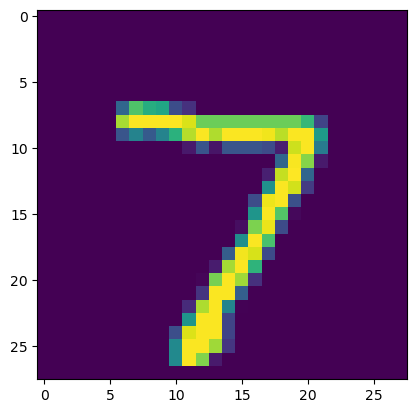

In [8]:
# 加载模型
model.load('output/mnist')

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])
